In [2]:
import streamlit as st
import pandas as pd
import numpy as np
# import rongzi
import graphviz

In [7]:
import os
os.chdir('../rongzi/')
from IPython.display import display, Markdown, Image

In [ ]:
st.title("poem exploration")
p = st.text_input(label='Enter a name or short poem in Chinese characters,\nmaximum 5 characters:', max_chars=5)
p = '你好嗎'
rz = rongzi.RongZi()
df = rz.analyze_sequence(p)
st.markdown('---')
st.markdown(df.to_markdown(index=False))

In [ ]:
st.text_input(label='Enter a short poem in Chinese characters,\nmaximum 10 characters:', max_chars=10)

In [ ]:
st.radio('Choose a Chinese phrase by one of two methods:',
         ['Choose from a list of proverbs', 'Type it in yourself'])

In [ ]:
chengyus = pd.read_csv('./assets/chengyu.csv', sep='\t')

In [ ]:
st.button('bla', print('hello'))

In [ ]:
rows = list(np.random.choice(chengyus.index, 5, replace=False))
cols = ['Proverb', 'Literal Meaning', 'Figurative Meaning', 'Pinyin']
chengyus.loc[rows, cols].reset_index(drop=True)

In [ ]:
gr = graphviz.Digraph('G', filename='cluster.gv')
with gr.subgraph(name='cluster_1') as cl:
    cl.attr(color='blue')
    cl.node_attr['style'] = 'filled'
    cl.edges([('b0', 'b1'), ('b1', 'b2'), ('b2', 'b3')])
    cl.attr(label='process #2')

In [ ]:
chengyu = chengyus.loc[0]
lines = "**"+chengyu.index+"**: " + chengyu
display(Markdown('  \n'.join(lines)))

In [ ]:
display(Markdown(df.to_markdown()))

### test concepts for graph_paths

In [4]:
pp = pd.Series({'ad': 'abcd', 'dh':'defgh', 'hn':'hijklmn'})
# pp = pp.to_dict()
pp

ad       abcd
dh      defgh
hn    hijklmn
dtype: object

In [5]:
node_pairs = pp.index.to_list()
paths = pp.map(lambda x: x[1:-1]).to_list()
node_pairs, paths

(['ad', 'dh', 'hn'], ['bc', 'efg', 'ijklm'])

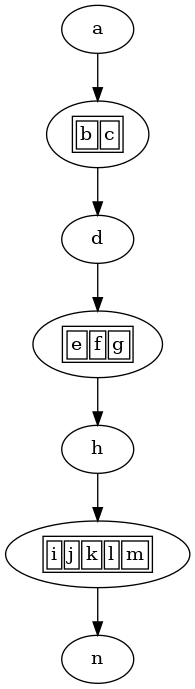

In [8]:
g = graphviz.Digraph()

g.node(node_pairs[0][0])
for i in range(3):
    label = f"""<
    <TABLE><TR>
        {''.join(['<TD>'+j+'</TD>' for j in paths[i]])}
    </TR></TABLE>
    >"""
    g.node(paths[i], label=label)
    g.edge(node_pairs[i][0], paths[i])
    g.node(node_pairs[i][1])
    g.edge(paths[i], node_pairs[i][1])

g.render(format='png')
Image('Digraph.gv.png')

In [17]:
print(g.source)

digraph {
	a
	bc [label=<
    <TABLE><TR>
        <TD>b</TD><TD>c</TD>
    </TR></TABLE>
    >]
	ad -> bc
	d
	bc -> d
	efg [label=<
    <TABLE><TR>
        <TD>e</TD><TD>f</TD><TD>g</TD>
    </TR></TABLE>
    >]
	dh -> efg
	h
	efg -> h
	ijklm [label=<
    <TABLE><TR>
        <TD>i</TD><TD>j</TD><TD>k</TD><TD>l</TD><TD>m</TD>
    </TR></TABLE>
    >]
	hn -> ijklm
	n
	ijklm -> n
}



### graph

In [4]:
from fpdf import FPDF
import base64
from tempfile import NamedTemporaryFile
import rongzi

In [8]:
rz = rongzi.RongZi('開')
rz.get_vertical_family_tree()

[]

In [11]:
def _create_download_link(val, filename):
    b64 = base64.b64encode(val)  # val looks like b'...'
    return f'<a href="data:application/octet-stream;base64,{b64.decode()}" download="{filename}.pdf">Download file</a>'

In [34]:
pdf = FPDF()
pdf.add_page()
with NamedTemporaryFile(delete=False, suffix=".pdf") as tmpfile:
    bytes_file = graphviz.pipe('dot', 'png', bytes(rz.vert_tree.source, 'utf-8'))    # (format='pdf',filename=tmpfile.name)
    # pdf.image(tmpfile.name, 10, 10, 200, 100)
    html = _create_download_link(bytes_file, "testfile")   # pdf.output(dest="S").encode("utf-8")
    st.markdown(html, unsafe_allow_html=True)    

In [35]:
pdf = FPDF()
pdf.add_page()
with NamedTemporaryFile(delete=False, suffix=".pdf") as tmpfile:
    bytes_file = graphviz.pipe('dot', 'png', bytes(rz.vert_tree.source, 'utf-8'))   
    html = _create_download_link(bytes_file, "testfile")
    st.markdown(html, unsafe_allow_html=True)    
    